# 1 Community Mobility Data

In [1]:
library('lubridate')
#install.packages('lubridate')


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
global <- read.csv('Global_Mobility_Report.csv')

In [3]:
global[is.na(global)] <- 0

In [4]:
variables <- colnames(global)[10:15]

variables
print(global$date[1])
#unique(global['country_region'])

[1] "retail_and_recreation_percent_change_from_baseline"
[2] "grocery_and_pharmacy_percent_change_from_baseline" 
[3] "parks_percent_change_from_baseline"                
[4] "transit_stations_percent_change_from_baseline"     
[5] "workplaces_percent_change_from_baseline"           
[6] "residential_percent_change_from_baseline"

[1] "2020-02-15"


In [8]:
weeklychange <- function(variable,countryS){
    country <- global[global$country_region == countryS,]
    var <- country[c('date',variable)]
    weeks <- vector()
    for(i in seq(1:nrow(var))){
        weeks <- c(weeks,week(var[i,1]))
    }
    var['weeks']<-weeks
    weekly <- aggregate(var[variable],list(var$weeks),FUN = mean)
    colnames(weekly) <- c("week","var")
    plot(weekly$var, type = 'l',
    xlab = paste('Weeks from',var$date[1]), ylab = 'Percent Change From Baseline',
    main = variable)
}

monthlychange <- function(variable,countryS){
    country <- global[global$country_region == countryS,]
    var <- country[c('date',variable)]
    day1 <- var[1,1]
    months <- vector()
    month <- 0
    mem <- 0
    for(i in seq(1:nrow(var))){  
        thismonth <- month(var[i,1])
         months <- c(months,thismonth)
    }
    var['months']<-months
    monthly <- aggregate(var[variable],list(var$months),FUN = mean)
    colnames(monthly) <- c("month","var")
    plot(monthly$var, type = 'l',
    xlab = paste('Months from',var$date[1]), ylab = 'Percent Change From Baseline',
    main = variable)
}

[1] "Belgium - weekly changes in visitor Levels"


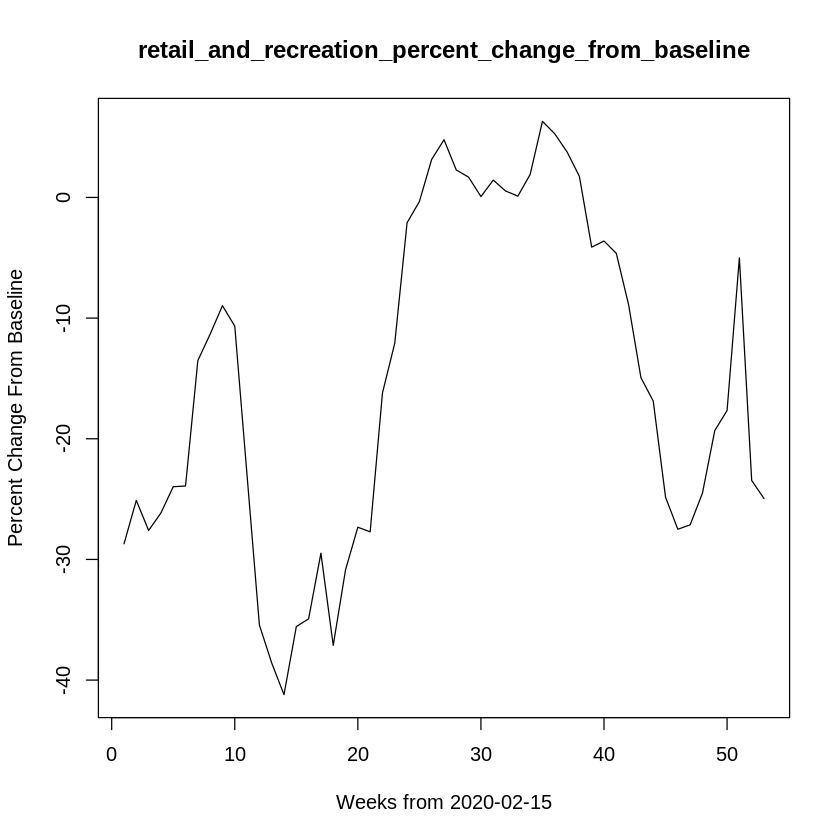

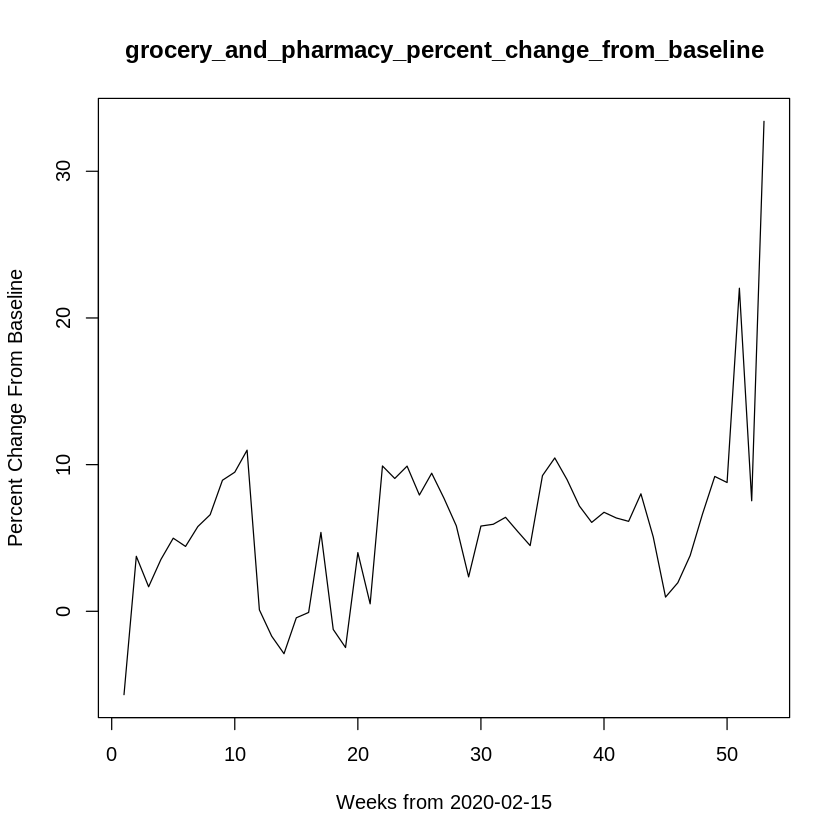

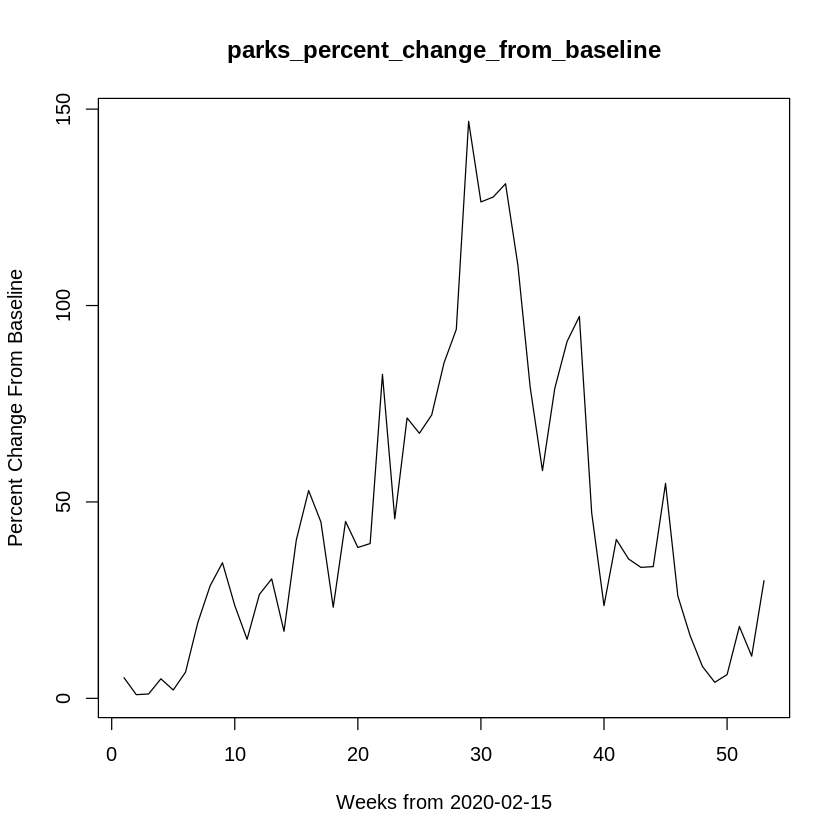

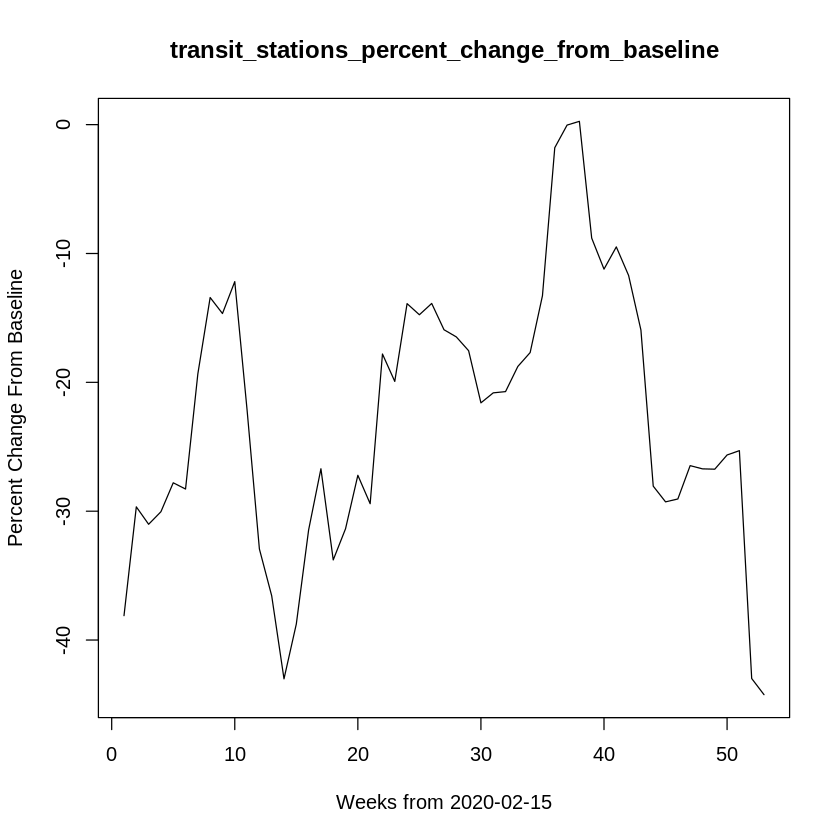

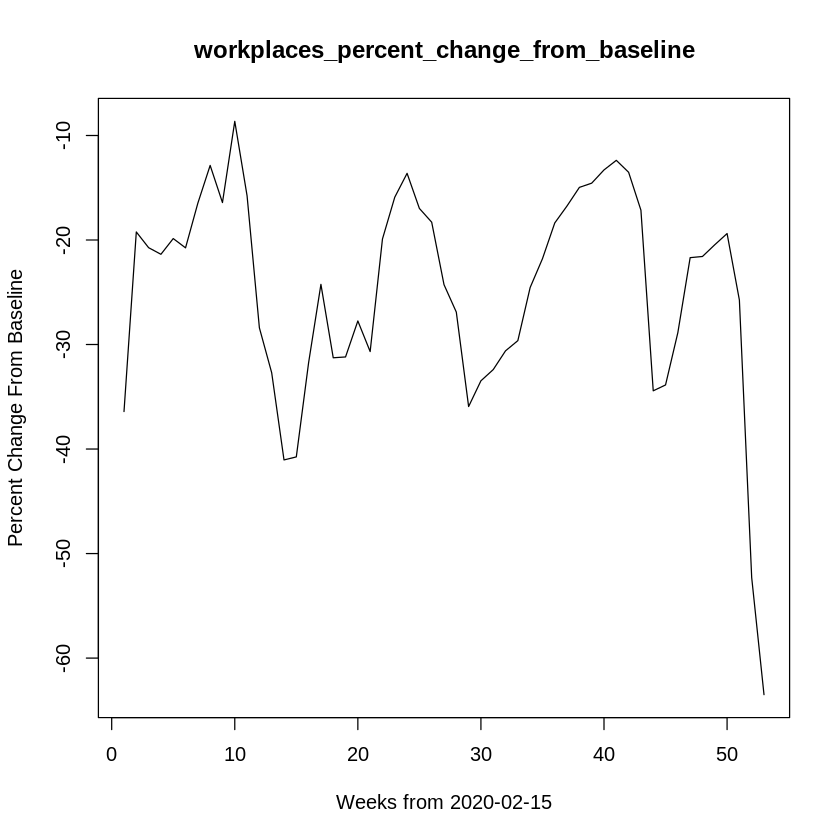

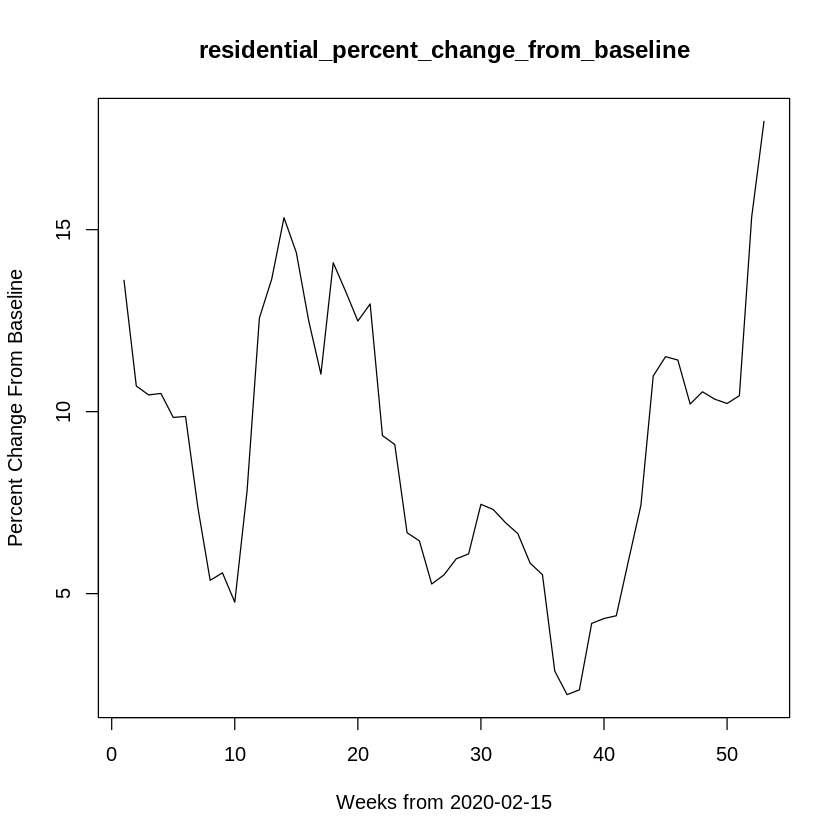

In [13]:
print('Belgium - weekly changes in visitor Levels')
for(vari in variables){
    weeklychange(vari,'Belgium')
}


[1] "Belgium - monthly changes in visitor Levels"
   month        var
1      1 -26.747696
2      2 -15.382294
3      3 -24.905530
4      4 -34.965873
5      5 -28.968254
6      6  -3.910714
7      7   1.629032
8      8   2.329493
9      9   2.096429
10    10  -8.720046
11    11 -25.978571
12    12 -16.544931
   month       var
1      1  1.032258
2      2  6.033199
3      3  5.118280
4      4  1.296032
5      5  1.037415
6      6  8.753571
7      7  5.387097
8      8  6.105991
9      9  8.541667
10    10  7.459677
11    11  2.260714
12    12 13.048387


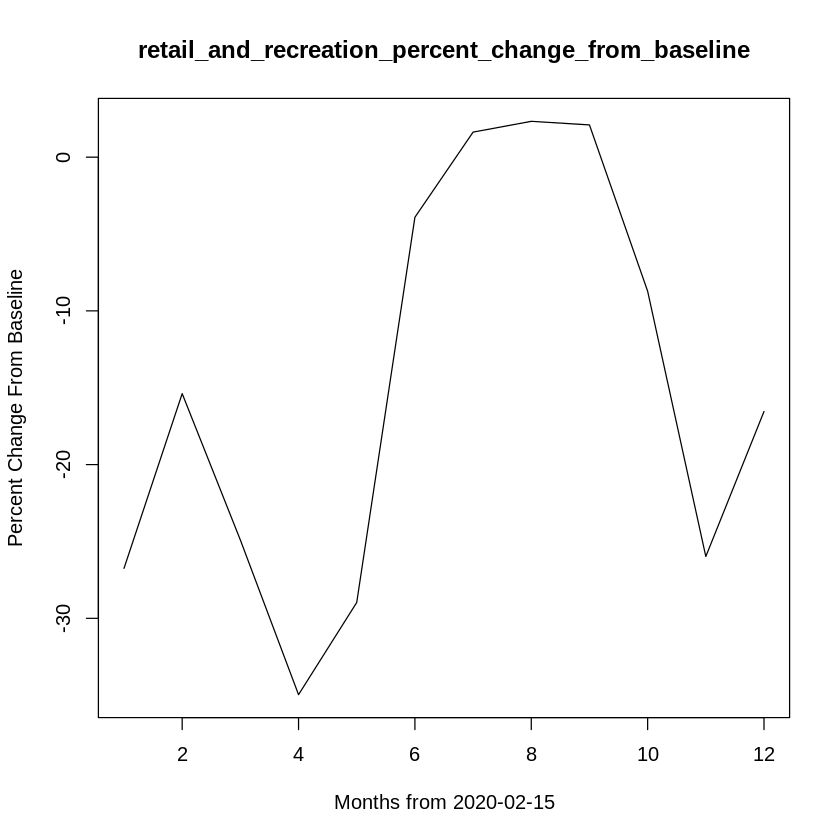

   month        var
1      1   3.270737
2      2  19.772636
3      3  24.586022
4      4  37.874603
5      5  43.131519
6      6  66.083333
7      7 113.847926
8      8 100.801843
9      9  77.259524
10    10  32.171659
11    11  29.690476
12    12  10.073733


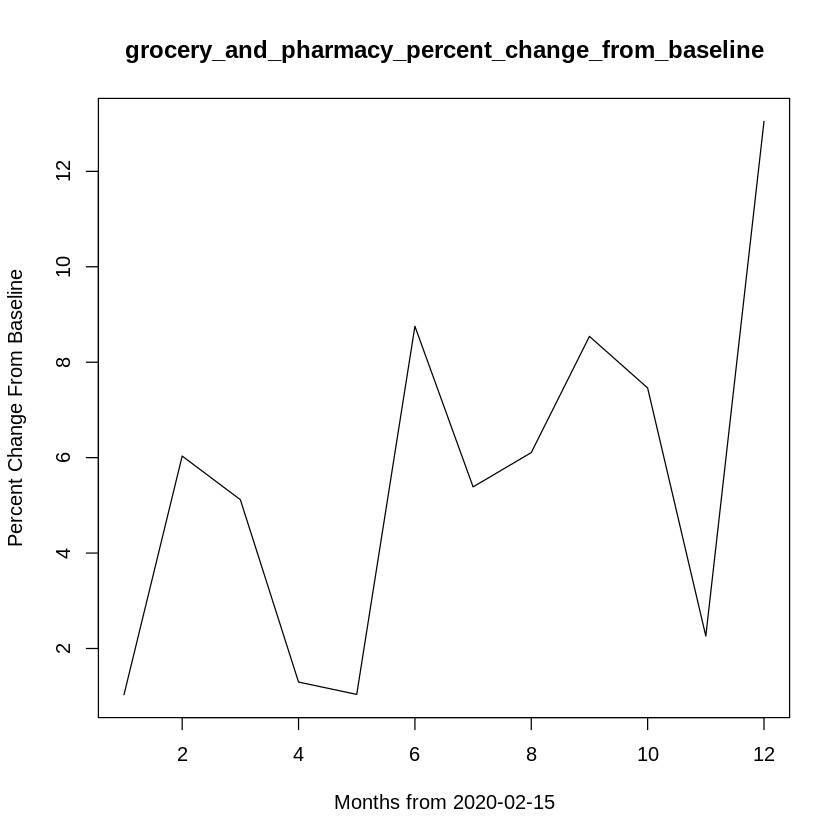

   month        var
1      1 -31.695853
2      2 -19.422535
3      3 -24.854071
4      4 -34.793651
5      5 -28.243764
6      6 -15.972619
7      7 -18.331797
8      8 -18.345622
9      9  -2.946429
10    10 -12.955069
11    11 -28.970238
12    12 -30.671659


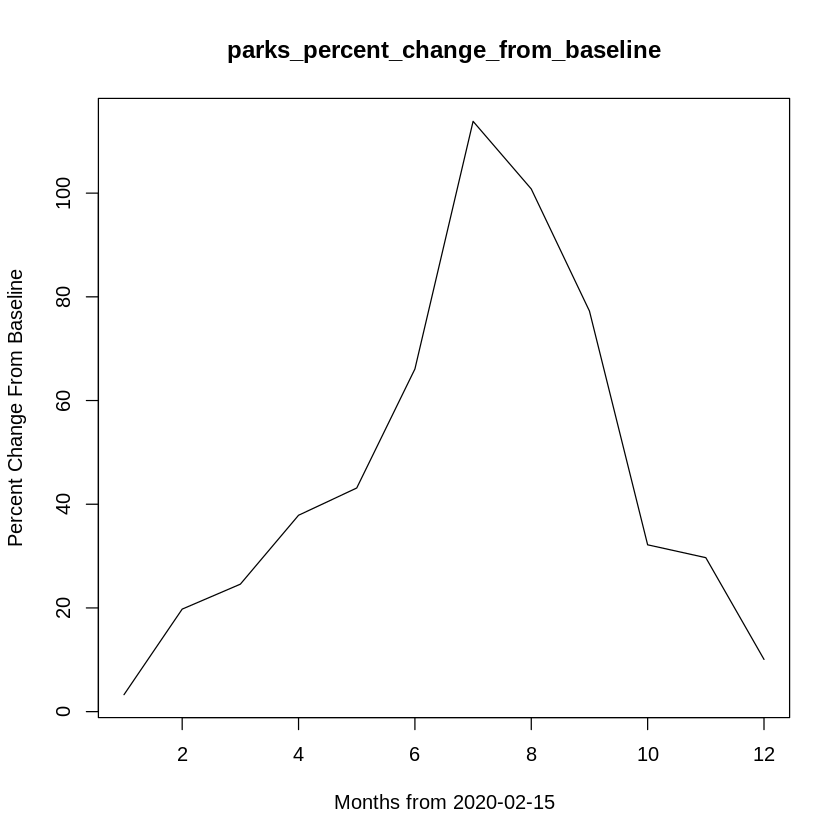

   month       var
1      1 -23.31106
2      2 -16.75654
3      3 -21.04071
4      4 -34.21429
5      5 -27.68367
6      6 -17.18810
7      7 -30.83295
8      8 -26.84217
9      9 -16.89286
10    10 -14.73387
11    11 -29.11429
12    12 -30.90323


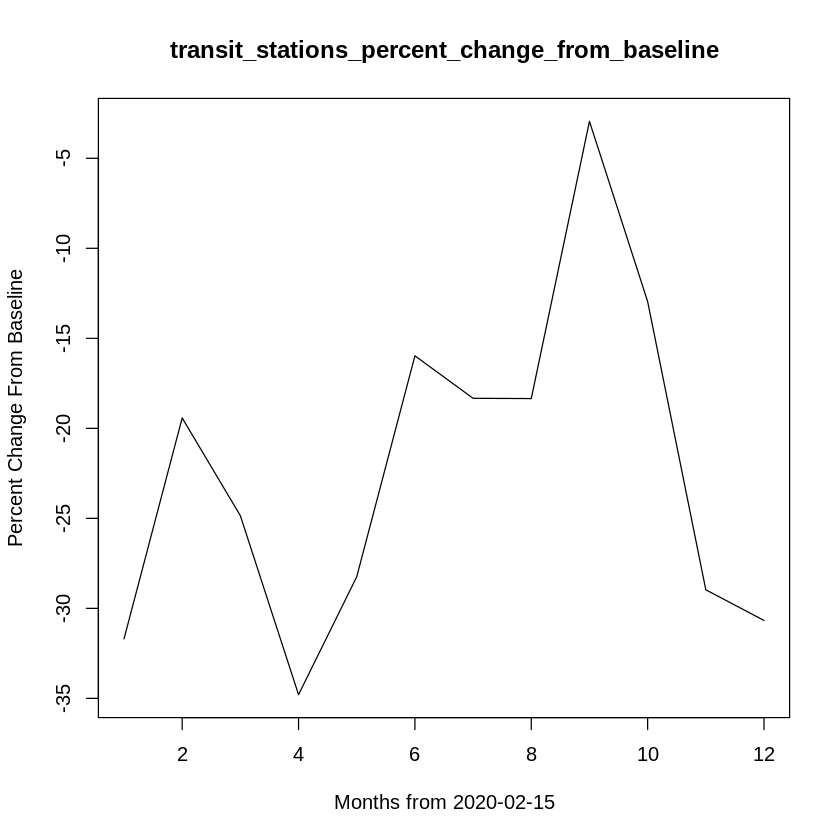

   month       var
1      1 11.071429
2      2  7.276660
3      3  9.284946
4      4 13.293651
5      5 12.472789
6      6  7.214286
7      7  6.449309
8      8  6.319124
9      9  3.080952
10    10  5.867512
11    11 11.220238
12    12 11.860599


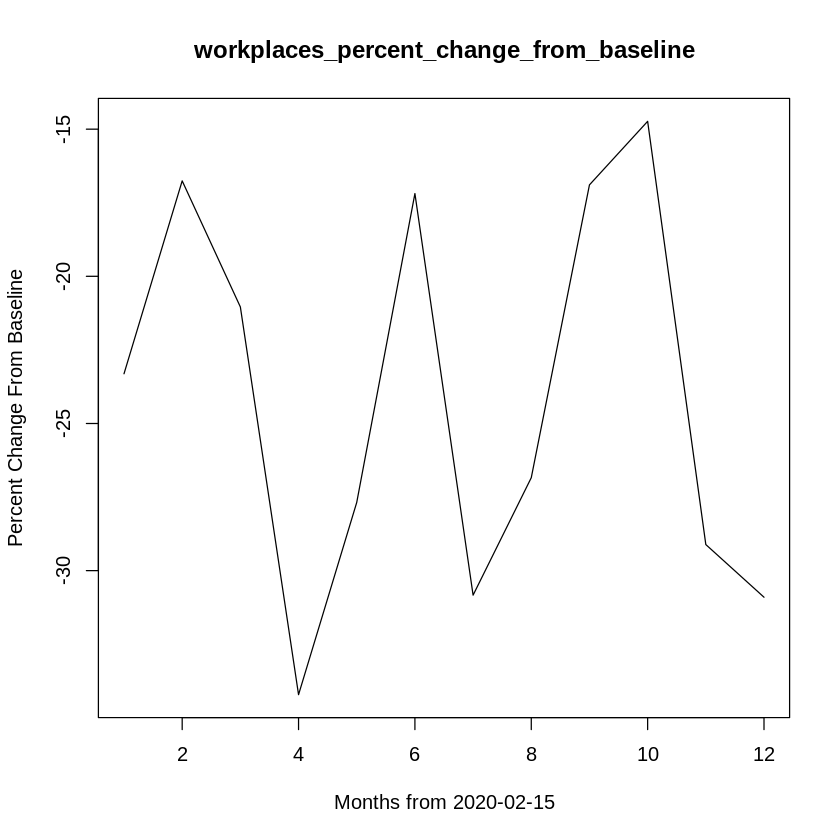

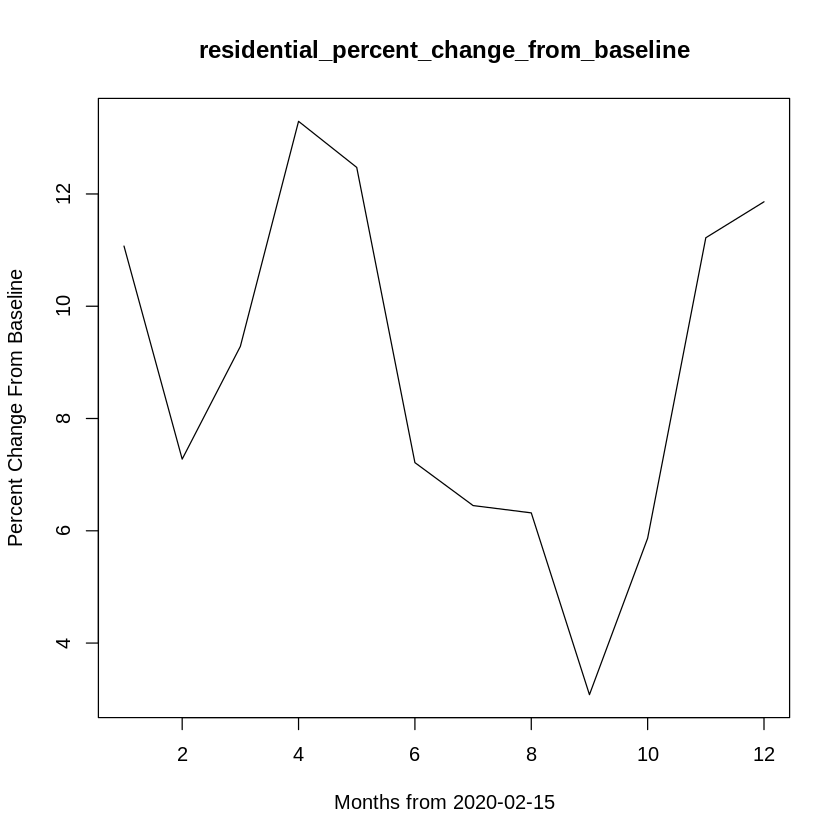

In [14]:
print('Belgium - monthly changes in visitor Levels')
for(vari in variables){
    monthlychange(vari,'Belgium')
}


[1] "France - weekly changes in visitor levels"


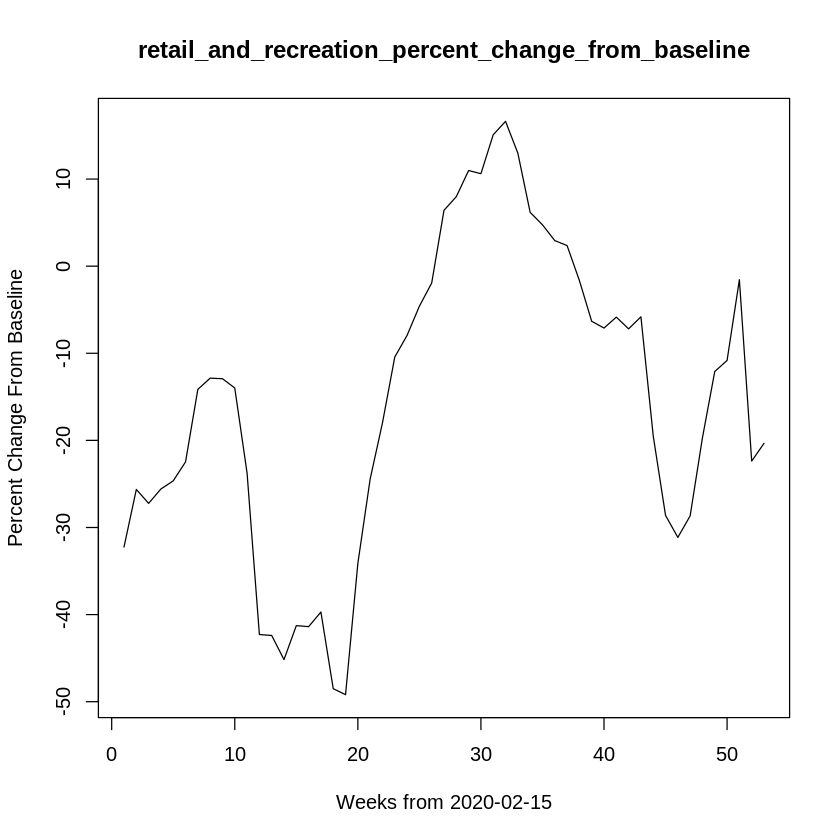

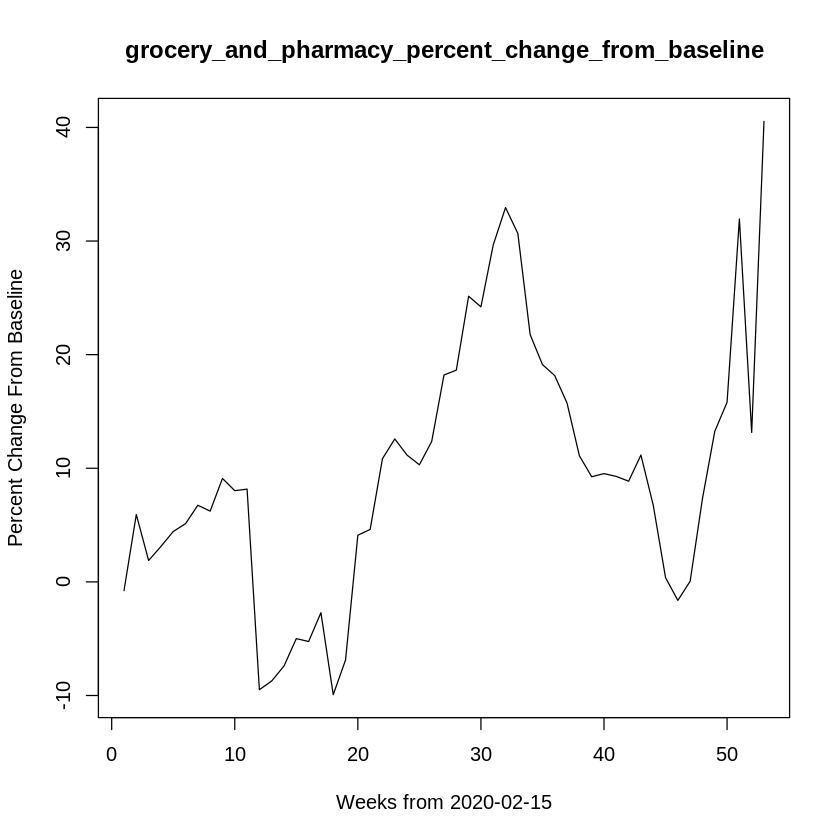

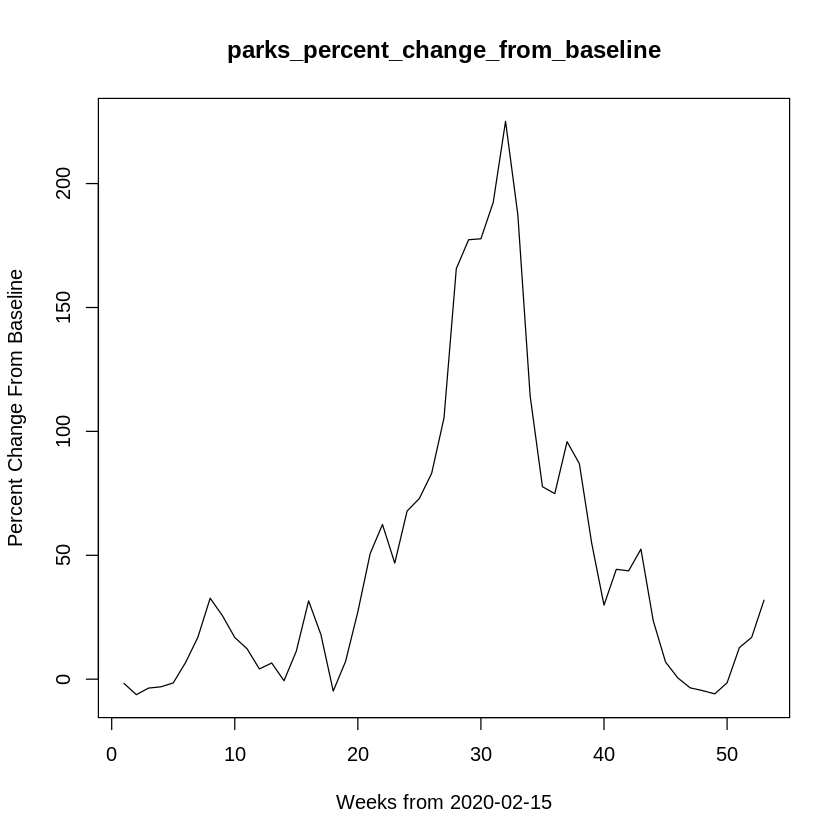

In [15]:
print('France - weekly changes in visitor levels')
for(vari in variables){
    weeklychange(vari,'France')
}


In [ ]:
print('France - monthly changes in visitor levels')
for(vari in variables){
    monthlychange(vari,'France')
}

In [ ]:
print('Ireland - weekly changes in visitor levels')
for(vari in variables){
    weeklychange(vari,'Ireland')
}

In [ ]:
print('Ireland - monthly changes in visitor levels')
for(vari in variables){
    monthlychange(vari,'Ireland')
}

# Random Number Generator, middle square algorythim

In [100]:
remove0 <- function(string){
    as.list(strsplit(string, "")[[1]])
    
}

nextnum <- function(num){
    digits <- nchar(num)
    num2 <- num^2
    digits2 <- nchar(num2)
    if (digits2 < 2*digits){
        num2 <- num2*10^(2*digits-digits2)
        digits2 <- nchar(num2)
    }
    quart <- ceiling(digits2/4)
    ans <- as.numeric(substring(toString(num2), quart+1,quart+digits))
    if (nchar(ans) < digits){ans <- ans*10^(digits - nchar(ans))}
    return(ans)
}

rgen <- function(seed,n){
    rnum <- vector()
    mem <- nextnum(seed)
    for (i in 1:n){
        rnum <- c(rnum,mem)
        mem <- nextnum(mem)
    }
    return(rnum)
}

rgen(1234567,100)

[1] 1556774 5452870 3791236 3470407 3724745 3725315 7971849 3764780 3568448
 [10] 3821128 1019192 7523328 4641950 7699802 6950839 4162803 8928816 3755161
 [19] 1234135 8919820 3188832 8649524 4265426 3858961 1579999 3968400 8198560
 [28] 6386073 1928361 5761463 4455900 5044810 1079360 1800960 4569216 7734854
 [37] 7966401 3544892 6259291 8723822 5070287 7810262 1925080 9330064 9424400
 [46] 9315360 5931929 7781661 4247918 4807334 4601870 7207496 7998590 7441988
 [55] 3185392 6722193 7878729 4370655 2625129 3022666 5097475 4251375 4189390
 [64] 9885720 7459918 3765660 1952350 6705225 4230000 8929000 2704100 1568100
 [73] 9376100 1251210 5264641 6444858 6194640 3564729 7292843 5559022 2725596
 [82] 8735552 9868744 2108137 2416107 5730354 6956965 9362011 7249964 1978001
 [91] 4879560 1057930 2158849 6290048 4703842 6129560 1505793 4125588 4763450
[100] 4559020

[1] 154853

# ex 3 Bayesian Inference

## Bayes Theorum

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

Applied to our problem. y is defined as the fraction of the whole audience that has read the journal. r is the fraction of people in the sample who read the journal. y is not known. But we want to know the probability that y is a certain value given we have measured r to be 29/150.

$$P(y|r) = \frac{P(r|y) P(y)}{P(r)}$$

$P(y)$, is th prior. The prior knowledge of the probability of y. It would be more correct to write $P(y|M), the probability of y given a model which we guessed. For example, maybe last year it was estimated to be arond 50/150, so we could assume the P(y) to be a wide gussian around 150.

$P(r)$, is the marginal liklyhood. It is the probability that we measure r regardless of wether y is true or not. This is usually a constant.

$P(r|y)$, is the likelihood. It is the probability we get a value for r given an assumption for the true value y. In this situation a good model for the likelyhood is a binomial distribution. Where number of trials = 150, success is someone reading the journal, probability of success is y, and we can calcualte the probability of 29 successes. ie the probability that r = 29/150 given the guessed true fraction y. We can calculate this probability/likelyhood for all y values. The goal is to find the y value that maximises the probability of measuring 29/150. This is the most likely value of y. It doesn't take a genious to know that this value of y will be 29/150. This is why more measurements are needed or some extra knowledge of the prior is needed. 

$P(y|r)$, is the posterior. It is what we want to know. We which to know the probability that a guessed y is true given we have made the measurement r. Normally this is not obvious to us but the inverse is. Normaly it is more obvious what is the probability of a measurement r given a guessed y. Thus bayes theorum is useful. 

#### a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal ?

I believe this question is reffering to the prior $P(y)$. Apart from the measurememt there is no provided information about the situation. Thus prior to the measurement there was no knowledge about the distribution of y and so a uniform distribution is the best assumption. 

If this question is reffereing to the liklihood then the best distribution to assume is the binomial as explained in my preamble.

#### b) Assuming a uniform prior, what is the posterior distribution for y ?

If $P(y)$ is uniform then it is the same for every value of r. Thus it is a constant. P(r) was already a constant. Thus bayes theorum becomes:

$$P(y|r) = C P(r|y)$$

Thus the posterior is equal to the likelyhood multiplied by a scaling factor for normalisation. 

area is: 0.006622517
With the normalisation constant the area under the posterior shoud be one, it is: 1

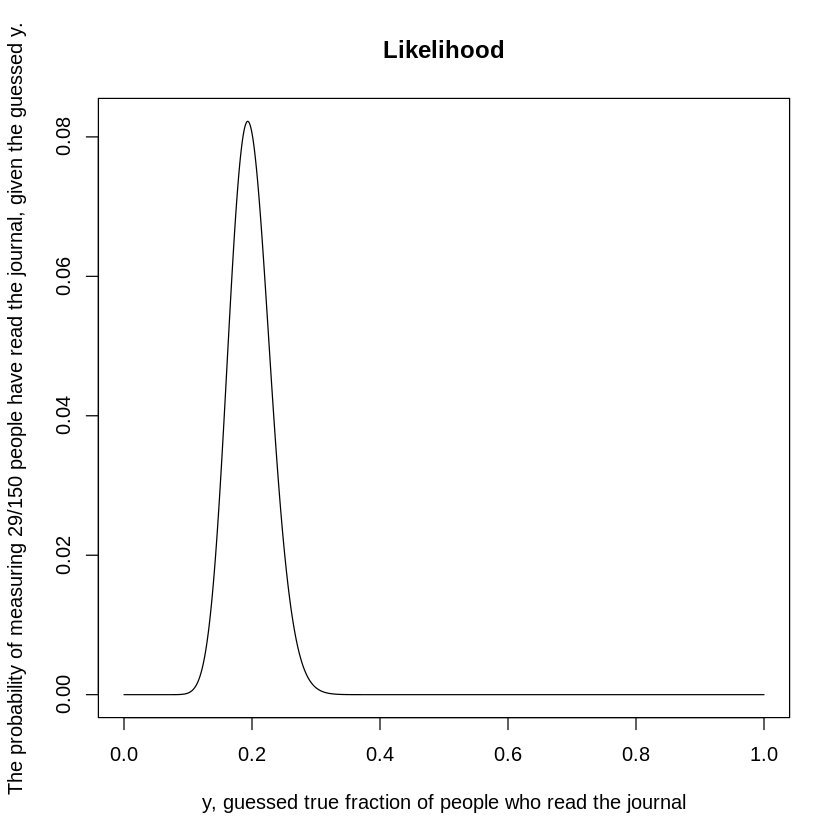

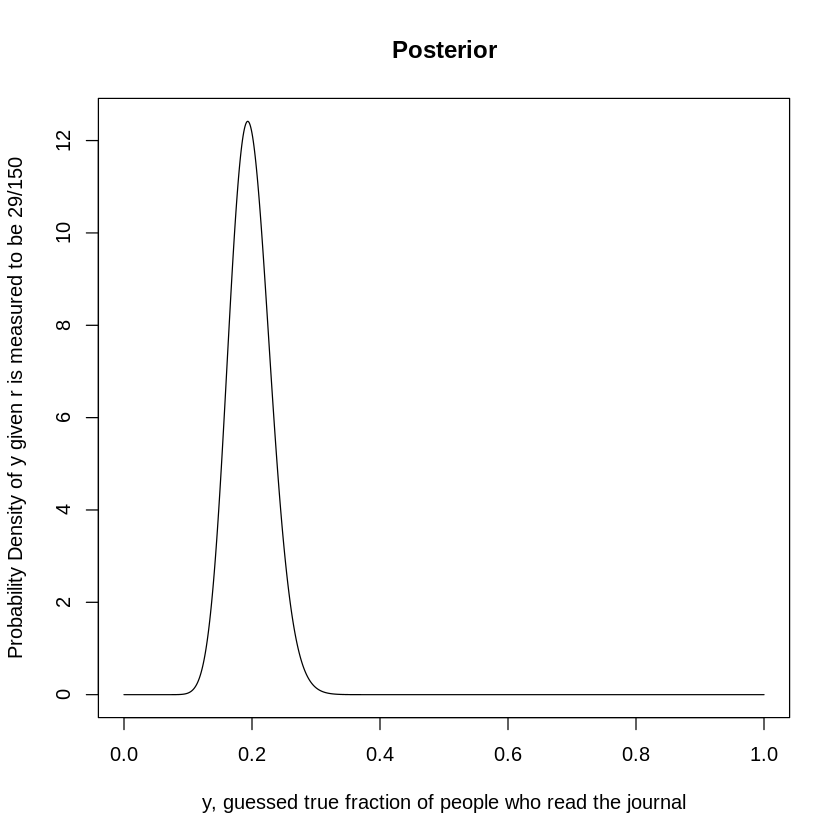

In [16]:
# plotting the likelyhood. 
y <- seq(0,1,0.001)
s <- 29
n <- 150
Prgy <- dbinom(29, size = 150, prob = y)

plot(y, Prgy, type = 'l', main = 'Likelihood', xlab = 'y, guessed true fraction of people who read the journal',
     ylab = 'The probability of measuring 29/150 people have read the journal, given the guessed y.')

#find area under the curve, to get normalisation constant
likelihood <- function(y){
    return(dbinom(29, size = 150, prob = y))
}
area <- integrate(likelihood, lower = 0, upper = 1)
cat('area is:', area$value)

posterior <- function(y){
    #including normalisation constant
    return((1/area$value)*dbinom(29, size = 150, prob = y))
}

one <- integrate(posterior, lower = 0, upper = 1)
cat('\nWith the normalisation constant the area under the posterior shoud be one, it is:',one$value)

Pygr <- posterior(y)

plot(y,Pygr, type = 'l', main = 'Posterior', xlab = 'y, guessed true fraction of people who read the journal',
    ylab = 'Probability Density of y given r is measured to be 29/150')



# ex 4 Baysian Inference

A coin is flipped n = 30 times with the following outcomes:
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H,
T, H, H, H
 
## Assuming a flat prior

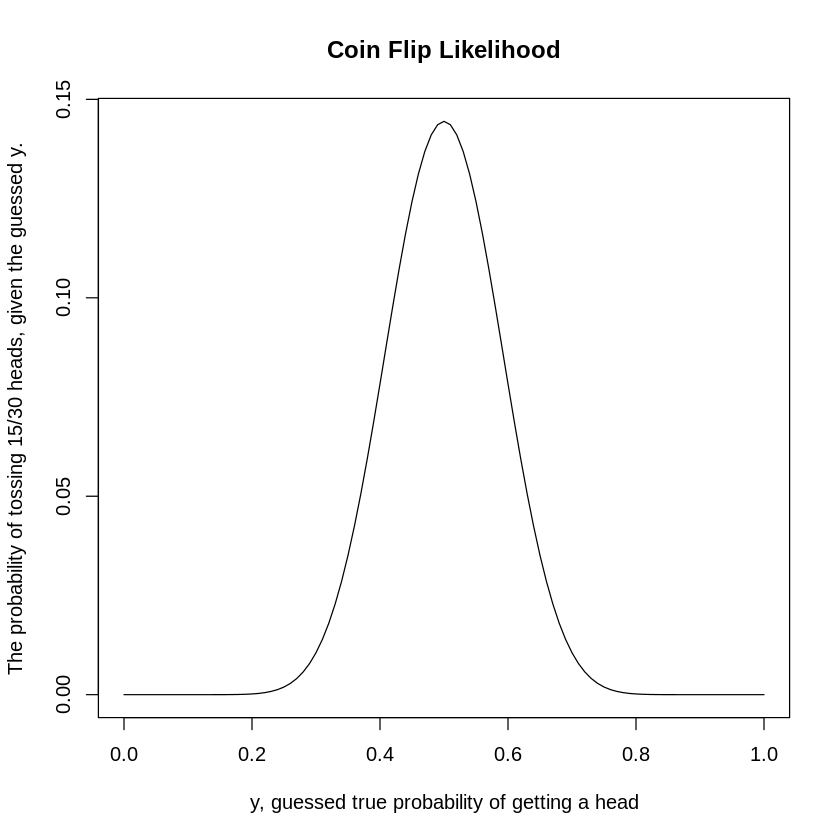

The area under the posterior should be 1, it is, 1

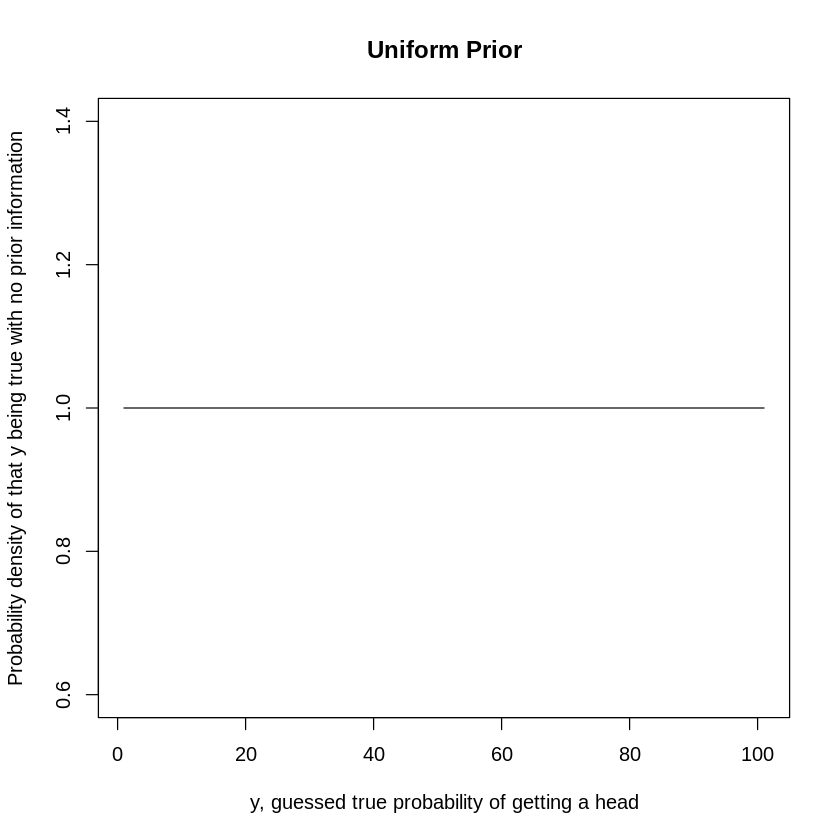

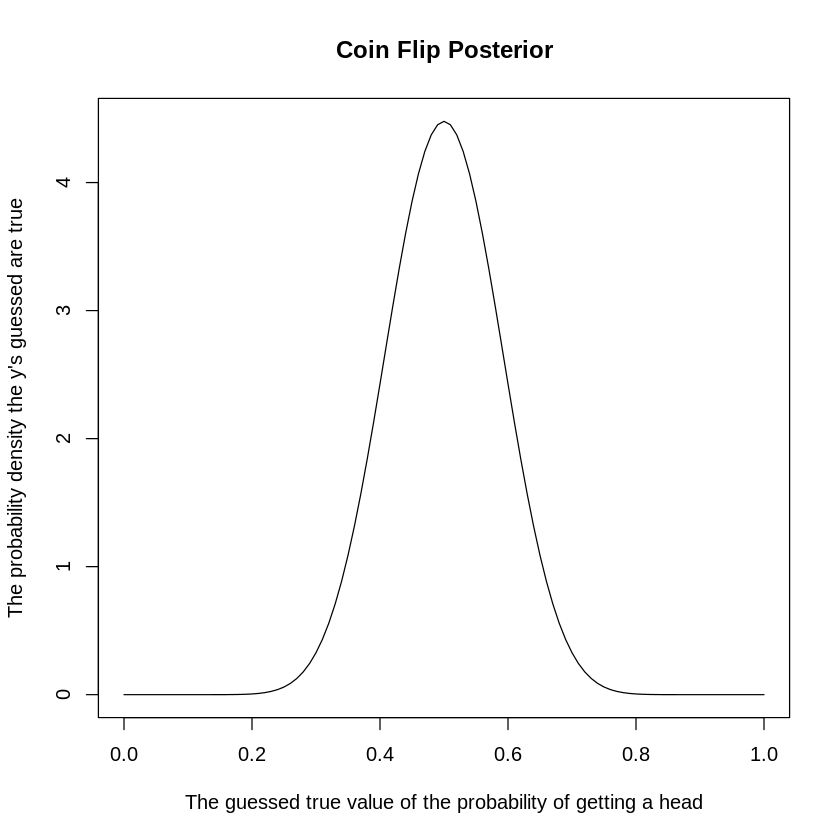

In [23]:
h <- 15
t <- 15

# y is the true probability of getting a head on each flip
# r is the fraction of heads recorded over number of flips

#likelihood
y <- seq(0,1,0.01)
r <- 15
Prgy <- dbinom(r,size = 30, y)
plot(y, Prgy, type = 'l', main = 'Coin Flip Likelihood', xlab = 'y, guessed true probability of getting a head',
     ylab = 'The probability of tossing 15/30 heads, given the guessed y.')

likelihood <- function(y){
    return(dbinom(r,size = 30,y))
}

#prior
prior <- dunif(y)
plot(prior, type = 'l', main = 'Uniform Prior', xlab = 'y, guessed true probability of getting a head'
    ,ylab = 'Probability density of that y being true with no prior information')

area <- integrate(likelihood, lower = 0, upper = 1)

posterior <- function(y){
    1/area$value * likelihood(y)
}

one <- integrate(posterior, lower = 0, upper = 1)
cat('The area under the posterior should be 1, it is,', one$value)

Pygr <- posterior(y)
plot(y,Pygr, type = 'l', main = 'Coin Flip Posterior', xlab = 'The guessed true value of the probability of getting a head'
    , ylab = "The probability density the y's guessed are true")

## Assuming a beta prior

[1] "The likelihood is the same as before"


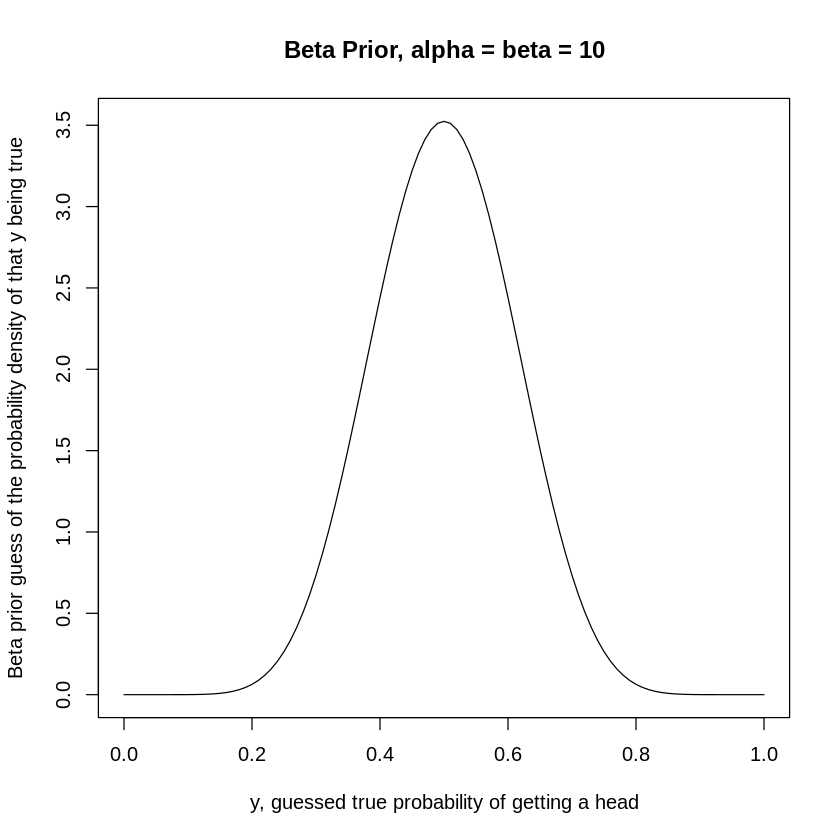

[1] "The curve is narrower after applying the likelyhood and posterior together. This shows both pieces of information has helped narrow down closer to the likely value of y = 0.5."


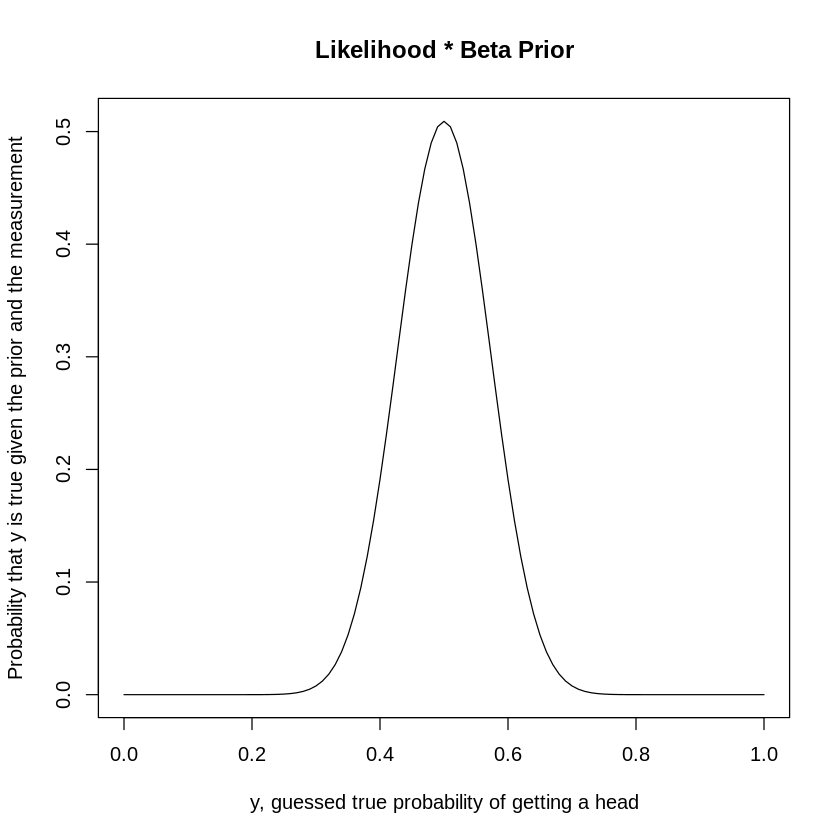

The area under the posterior should be one, it is: 1

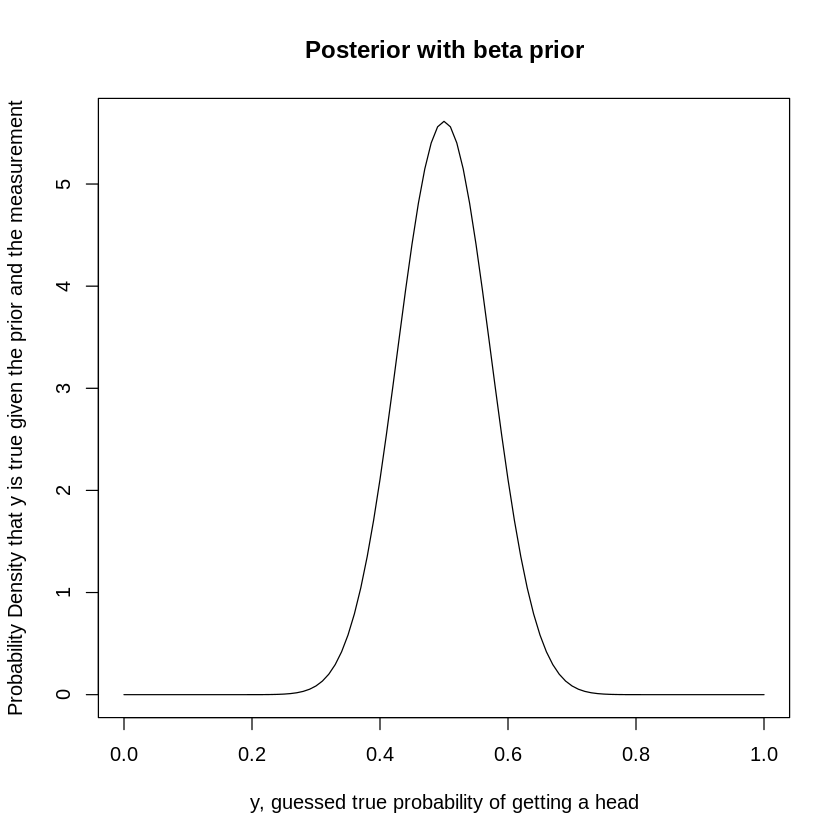

In [67]:
#beta prior

alpha <- 10
beta <- 10

prior <- dbeta(y,alpha,beta)

plot(y,prior, type = 'l', main = 'Beta Prior, alpha = beta = 10', xlab = 'y, guessed true probability of getting a head'
    ,ylab = 'Beta prior guess of the probability density of that y being true')

# likelihood * prior
likeliprior <- function(y){
    dbinom(r,size = 30,y)*dbeta(y,alpha,beta)
}
print('The likelihood is the same as before')

lp <- likeliprior(y)

plot(y,lp, type = 'l', main = 'Likelihood * Beta Prior', xlab = 'y, guessed true probability of getting a head',
    ylab = 'Probability that y is true given the prior and the measurement')
print('The curve is narrower after applying the likelyhood and posterior together. This shows both pieces of information has helped narrow down closer to the likely value of y = 0.5.')
# finding the normalisation constant. The P(r), probability of getting the measurement given no prior information is a constant.
area <- integrate(likeliprior, lower = 0, upper = 1)

posterior <- function(y){
    1/area$value * likeliprior(y)
}

po <- posterior(y)

plot(y, po, type = 'l', main = 'Posterior with beta prior',xlab = 'y, guessed true probability of getting a head',
    ylab = 'Probability Density that y is true given the prior and the measurement')

one <- integrate(posterior, lower = 0, upper = 1)
cat('The area under the posterior should be one, it is:',one$value)

## 95% confidance intervals

The peak of the pdf is on y = 0.5. First the lower confidence interval will be found. The posterior will be integrated in a loop where the maximum bound is increased untill the area is 0.025. Since the posterior is symetric, the upper confidence interval can be found by 1-lower confidence interval.

In [75]:
#confidence interval
ci <- 0
upper <- seq(0,0.5,0.01)
found <- FALSE
for (up in upper){
    area <- integrate(posterior, lower = 0, upper = up)
    if (area$value >= 0.025 && found == FALSE){found <- TRUE; ci <- up}
}

lowerCI <- ci
upperCI <- 1-ci

plot(y, po, type = 'l', main = 'Posterior with beta prior',xlab = 'y, guessed true probability of getting a head',
    ylab = 'Probability Density that y is true given the prior and the measurement')
abline(v = lowerCI)
abline(v = upperCI)

ERROR: Error in integrate(posterior, lower = 0, upper = up): non-finite function value


In [68]:
upp <- 0

ar <- integrate(posterior,lower = 0, upper = upp)

In [48]:
one <- integrate(posterior, lower = 0, upper = 1)
cat('The area under the posterior should be one, it is:',one$value)

The area under the posterior should be one, it is: 1

In [76]:
for (i in seq(0,0.5,0.1)){    
    ar <- integrate(posterior,lower = 0, upper = upp)
}

ERROR: Error in integrate(posterior, lower = 0, upper = upp): non-finite function value
